In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:
data=pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data1 = data.select_dtypes('object')
data1.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
data1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
data2 = data.select_dtypes('int64')
data2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
def missingvalues(dataset):
    return dataset.isnull().sum()
missingvalues(data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
duplicate_rows = data.duplicated().any()
duplicate_rows

False

In [ ]:
for i in data1:
    print('Unique values:', i, set(data[i]))

Unique values: Attrition {'No', 'Yes'}
Unique values: BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values: Department {'Sales', 'Human Resources', 'Research & Development'}
Unique values: EducationField {'Marketing', 'Technical Degree', 'Other', 'Medical', 'Human Resources', 'Life Sciences'}
Unique values: Gender {'Male', 'Female'}
Unique values: JobRole {'Manager', 'Human Resources', 'Sales Executive', 'Research Scientist', 'Manufacturing Director', 'Sales Representative', 'Research Director', 'Healthcare Representative', 'Laboratory Technician'}
Unique values: MaritalStatus {'Single', 'Divorced', 'Married'}
Unique values: Over18 {'Y'}
Unique values: OverTime {'No', 'Yes'}


In [ ]:
data = data.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

In [ ]:
data.corr()

<ipython-input-16-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<ipython-input-17-ac5d9387517d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= data.corr()


<Axes: >

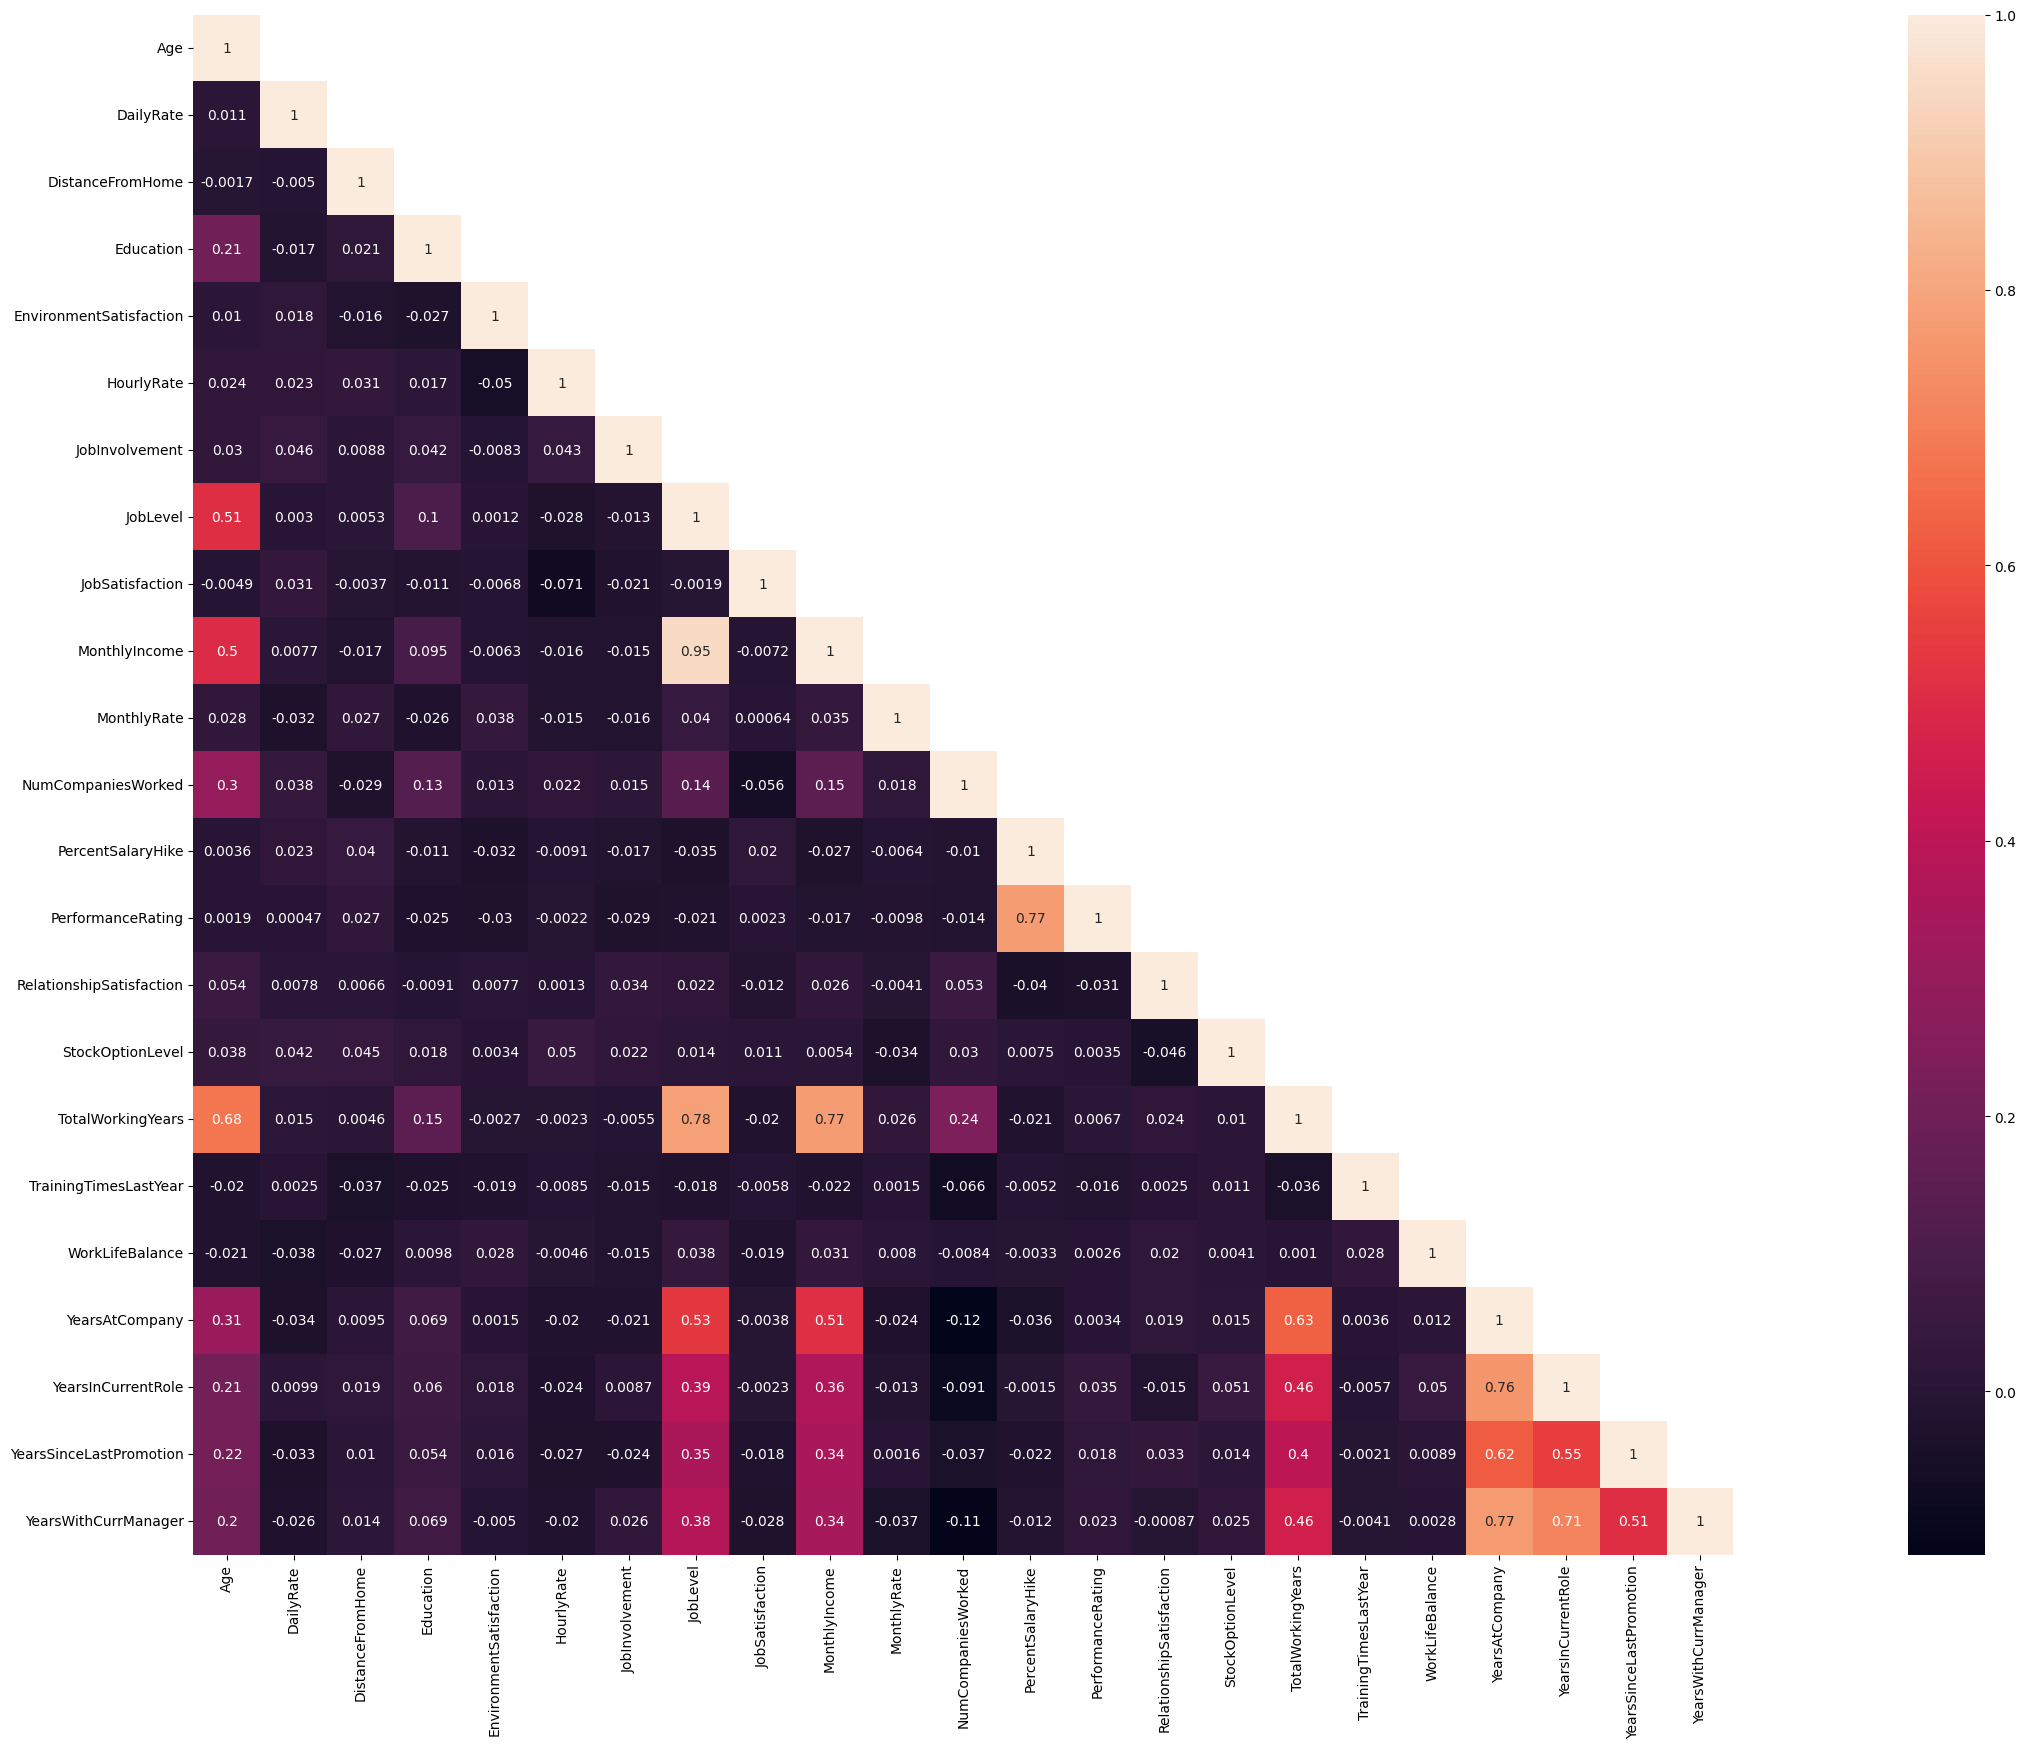

In [ ]:
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(45,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
fig = px.bar(data['Attrition'].value_counts().reset_index(), x='index', y='Attrition',
             labels={'index': 'Attrition', 'Attrition': 'Count'},
             title='Attrition',
             color='index',
             color_discrete_map={'Yes': 'red', 'No': '#FECB52'},
             )
fig.update_traces(marker=dict(line=dict(width=.5, color='DarkSlateGray')),
                  selector=dict(type='bar'))
fig.update_layout(
    height=500,
    width=500,
)
fig.show()

In [ ]:
attrition_counts = data['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']

total_count = attrition_counts['Count'].sum()
attrition_counts['Percentage'] = (attrition_counts['Count'] / total_count) * 100

fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Attrition', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[attrition_counts['Attrition'],
                       attrition_counts['Count'],
                       attrition_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Summary Table for Attrition',
    height=300,
    width=500
)
fig_table.show()

In [ ]:
fig = px.pie(data['Gender'].value_counts().reset_index(),
             names='index',
             values='Gender',
             title='Gender',
             color='index',
             color_discrete_map={'Male': '#B6E880', 'Female': '#FECB52'},
)
fig.update_layout(
    height=400,
    width=400,
)

fig.show()

In [ ]:
gender_counts = data['Gender'].value_counts(normalize=True).reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_counts['Percentage'] = gender_counts['Count'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Gender', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[gender_counts['Gender'], gender_counts['Count'], gender_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Gender Summary Table',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
fig = px.pie(data['MaritalStatus'].value_counts().reset_index(),
             names='index',
             values='MaritalStatus',
             title='Marital Status',
             color='index',
            color_discrete_map={'Single': '#00CC96', 'Married': '#B6E880', 'Divorced': '#FECB52'},
)
fig.update_layout(
    height=400,
    width=400,
)
fig.show()

In [ ]:
marital_status_counts = data['MaritalStatus'].value_counts(normalize=True).reset_index()
marital_status_counts.columns = ['MaritalStatus', 'Count']
marital_status_counts['Percentage'] = marital_status_counts['Count'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Marital Status', 'Count', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[marital_status_counts['MaritalStatus'], marital_status_counts['Count'].round(2), marital_status_counts['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Marital Status Summary Table',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
frequency_table = data['BusinessTravel'].value_counts().reset_index()
frequency_table.columns = ['BusinessTravel', 'Frequency']
fig = px.bar(frequency_table, x='Frequency', y='BusinessTravel', orientation='h',
             title='Business Travel',
             color='BusinessTravel',
             color_discrete_sequence=['#00CC96', '#B6E880', '#FECB52']
)
fig.update_layout(
    height=400,
    width=600,
    yaxis_title='Business Travel',
    xaxis_title='Frequency'
)
fig.show()

In [ ]:
frequency_table = data['BusinessTravel'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['BusinessTravel', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Business Travel', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['BusinessTravel'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Business Travel Frequency and Percentage Summary',
    height=400,
    width=400
)

fig_table.show()

In [ ]:
frequency_table = data['EducationField'].value_counts().reset_index()
frequency_table.columns = ['EducationField', 'Frequency']
fig = px.bar(frequency_table, x='Frequency', y='EducationField', orientation='h',
             title='EducationField',
             color='EducationField',
             color_discrete_sequence=['#00CC96', '#B6E880', '#FECB52']
)
fig.update_layout(
    height=400,
    width=600,
    yaxis_title='EducationField',
    xaxis_title='Frequency'
)
fig.show()

In [ ]:
frequency_table = data['EducationField'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['EducationField', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['EducationField', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['EducationField'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='EducationField Frequency and Percentage Summary',
    height=400,
    width=500
)

fig_table.show()

In [ ]:
fig = px.pie(data['Department'].value_counts().reset_index(),
             names='index',
             values='Department',
             title='Department',
             color='index',
            color_discrete_map={'Research & Development': '#00CC96', 'Human Resources': '#B6E880', 'Sales': '#FECB52'},
)
fig.update_layout(
    height=500,
    width=500,
)

fig.show()

In [ ]:
frequency_table = data['Department'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['Department', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Department', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['Department'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='Department Frequency and Percentage Summary',
    height=400,
    width=500
)

fig_table.show()

In [ ]:
fig = px.pie(data['OverTime'].value_counts().reset_index(),
             names='index',
             values='OverTime',
             title='OverTime',
             color='index',
             color_discrete_map={'No': '#FECB52', 'Yes': 'red'},
)
fig.update_layout(
    height=400,
    width=400,
)

fig.show()

In [ ]:
frequency_table = data['OverTime'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['OverTime', 'Frequency']
frequency_table['Percentage'] = frequency_table['Frequency'] * 100
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['OverTime', 'Frequency', 'Percentage'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[frequency_table['OverTime'], frequency_table['Frequency'].round(2), frequency_table['Percentage'].round(2).astype(str) + '%'],
               fill_color='lavender',
               align='left'))
])

fig_table.update_layout(
    title='OverTime Frequency and Percentage Summary',
    height=400,
    width=400
)

fig_table.show()

Plot with target variable


In [ ]:
df = px.data.tips()
fig = px.box(data, x="Attrition", y="Age", points="all")

fig.update_traces(marker=dict(color='#00CC96'),
                  selector=dict(type='box'))
fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
summary = data.groupby('Attrition')['Age'].describe().reset_index()

# Display the summary table
print(summary)

  Attrition   count       mean      std   min   25%   50%   75%   max
0        No  1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1       Yes   237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0


In [ ]:
data.Age.mean()

36.923809523809524

In [ ]:
fig = px.box(data, x='JobRole', y='MonthlyIncome', color='Attrition')

fig.update_traces(marker=dict(color='#FF97FF'), selector=dict(type='box', name='No'))
fig.update_traces(marker=dict(color='#AB63FA'), selector=dict(type='box', name='Yes'))

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1100)
fig.show()

In [ ]:
summary_table = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].describe().reset_index()

# Renaming columns for better readability
summary_table = summary_table.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
})

print(summary_table)

                      JobRole Attrition  Count          Mean  \
0   Healthcare Representative        No  122.0   7453.557377   
1   Healthcare Representative       Yes    9.0   8548.222222   
2             Human Resources        No   40.0   4391.750000   
3             Human Resources       Yes   12.0   3715.750000   
4       Laboratory Technician        No  197.0   3337.223350   
5       Laboratory Technician       Yes   62.0   2919.258065   
6                     Manager        No   97.0  17201.484536   
7                     Manager       Yes    5.0  16797.400000   
8      Manufacturing Director        No  135.0   7289.925926   
9      Manufacturing Director       Yes   10.0   7365.500000   
10          Research Director        No   78.0  15947.346154   
11          Research Director       Yes    2.0  19395.500000   
12         Research Scientist        No  245.0   3328.122449   
13         Research Scientist       Yes   47.0   2780.468085   
14            Sales Executive        No 

In [ ]:
fig = px.histogram(data, x="MonthlyIncome", color="Attrition")

fig.update_layout(
    height=500,
    width=800,
    title="Monthly Income by Attrition",
    xaxis_title="Monthly Income",
    yaxis_title="Count",
)

fig.show()

In [ ]:
summary_table = data.groupby('Attrition')['MonthlyIncome'].describe().reset_index()

# Renaming columns for better readability
summary_table = summary_table.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
})

print(summary_table)

  Attrition   Count         Mean  Standard Deviation  Minimum  \
0        No  1233.0  6832.739659         4818.208001   1051.0   
1       Yes   237.0  4787.092827         3640.210367   1009.0   

   25th Percentile  Median  75th Percentile  Maximum  
0           3211.0  5204.0           8834.0  19999.0  
1           2373.0  3202.0           5916.0  19859.0  


In [ ]:
fig = px.scatter_matrix(data, dimensions=["JobLevel", "TotalWorkingYears", "MonthlyIncome", "YearsInCurrentRole", "PerformanceRating"],
                        color="Attrition")

fig.update_layout(
    width=1000,
    height=1000,
    title='Scatter Matrix Plot',
)
fig.update_traces(marker=dict(color='purple'), selector=dict(mode='markers'))

fig.show()

In [ ]:
numeric_columns = ["JobLevel", "TotalWorkingYears", "MonthlyIncome", "YearsInCurrentRole", "PerformanceRating"]

summary_table = data.groupby('Attrition')[numeric_columns].describe().T.reset_index()

summary_table = summary_table.rename(columns={
    'index': 'Variable',
    'level_1': 'Statistical Measure'
})

print(summary_table)

Attrition             level_0 Statistical Measure            No           Yes
0                    JobLevel               count   1233.000000    237.000000
1                    JobLevel                mean      2.145985      1.637131
2                    JobLevel                 std      1.117933      0.940594
3                    JobLevel                 min      1.000000      1.000000
4                    JobLevel                 25%      1.000000      1.000000
5                    JobLevel                 50%      2.000000      1.000000
6                    JobLevel                 75%      3.000000      2.000000
7                    JobLevel                 max      5.000000      5.000000
8           TotalWorkingYears               count   1233.000000    237.000000
9           TotalWorkingYears                mean     11.862936      8.244726
10          TotalWorkingYears                 std      7.760719      7.169204
11          TotalWorkingYears                 min      0.000000 

In [ ]:
grouped_data = data.groupby(['JobRole', 'EducationField', 'Attrition']).size().reset_index(name='Count')

fig = px.bar(grouped_data, x='JobRole', y='Count', color='Attrition', barmode='group', facet_col='EducationField')

fig.update_layout(
    title="Attrition by Job Role and Education Field",
    xaxis_title="Job Role",
    yaxis_title="Count",
)

fig.show()

In [ ]:
summary_table = grouped_data.groupby(['JobRole', 'EducationField', 'Attrition'])['Count'].describe()

summary_table.head()

count  mean  std   min  \
JobRole                   EducationField Attrition                           
Healthcare Representative Life Sciences  No           1.0  58.0  NaN  58.0   
                                         Yes          1.0   2.0  NaN   2.0   
                          Medical        No           1.0  43.0  NaN  43.0   
                                         Yes          1.0   5.0  NaN   5.0   
                          Other          No           1.0   8.0  NaN   8.0   

                                                     25%   50%   75%   max  
JobRole                   EducationField Attrition                          
Healthcare Representative Life Sciences  No         58.0  58.0  58.0  58.0  
                                         Yes         2.0   2.0   2.0   2.0  
                          Medical        No         43.0  43.0  43.0  43.0  
                                         Yes         5.0   5.0   5.0   5.0  
                          Other          No          8.0   8.0   8.0   8.0

In [ ]:
fig = px.box(data, x='BusinessTravel', y='MaritalStatus', color='Attrition')

fig.update_traces(marker=dict(color='#FF97FF'), selector=dict(type='box', name='No'))
fig.update_traces(marker=dict(color='#AB63FA'), selector=dict(type='box', name='Yes'))

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=1100)
fig.show()

In [ ]:
summary_table = data.groupby(['BusinessTravel', 'MaritalStatus', 'Attrition']).size().reset_index(name='Count')

summary_table_pivot = summary_table.pivot_table(index=['BusinessTravel', 'MaritalStatus'], columns='Attrition', values='Count', fill_value=0)

print(summary_table_pivot)

Attrition                         No  Yes
BusinessTravel    MaritalStatus          
Non-Travel        Divorced        43    1
                  Married         56    3
                  Single          39    8
Travel_Frequently Divorced        50   13
                  Married         99   19
                  Single          59   37
Travel_Rarely     Divorced       201   19
                  Married        434   62
                  Single         252   75


In [ ]:
fig = px.scatter_matrix(data, dimensions=['MonthlyIncome', 'HourlyRate', 'DistanceFromHome'],
                        color='Attrition', title='Relationship between Monthly Income, Hourly Rate, Distance from Home, and Attrition')

fig.update_traces(diagonal_visible=False)

fig.show()

In [ ]:
numeric_columns = ['MonthlyIncome', 'HourlyRate', 'DistanceFromHome']

summary_table = data.groupby('Attrition')[numeric_columns].describe().T.reset_index()

summary_table = summary_table.rename(columns={
    'index': 'Variable',
    'level_1': 'Statistical Measure'
})

print(summary_table)

Attrition           level_0 Statistical Measure            No           Yes
0             MonthlyIncome               count   1233.000000    237.000000
1             MonthlyIncome                mean   6832.739659   4787.092827
2             MonthlyIncome                 std   4818.208001   3640.210367
3             MonthlyIncome                 min   1051.000000   1009.000000
4             MonthlyIncome                 25%   3211.000000   2373.000000
5             MonthlyIncome                 50%   5204.000000   3202.000000
6             MonthlyIncome                 75%   8834.000000   5916.000000
7             MonthlyIncome                 max  19999.000000  19859.000000
8                HourlyRate               count   1233.000000    237.000000
9                HourlyRate                mean     65.952149     65.573840
10               HourlyRate                 std     20.380754     20.099958
11               HourlyRate                 min     30.000000     31.000000
12          